In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set(style="whitegrid")


In [16]:
# Airbnb Dataset
airbnb_df = pd.read_csv("AB_NYC_2019.csv.csv")

# YouTube Dataset
youtube_df = pd.read_csv("US_youtube_trending_data.csv.csv")


In [17]:
## 🏨 Airbnb Dataset Cleaning


In [18]:
airbnb_df.head()
airbnb_df.info()
airbnb_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [19]:
airbnb_df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [20]:
# Fill missing 'reviews_per_month' with 0
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)

# Drop rows where 'name' or 'host_name' are missing
airbnb_df.dropna(subset=['name', 'host_name'], inplace=True)


In [21]:
airbnb_df.drop_duplicates(inplace=True)


In [22]:
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], errors='coerce')


(0.0, 500.0)

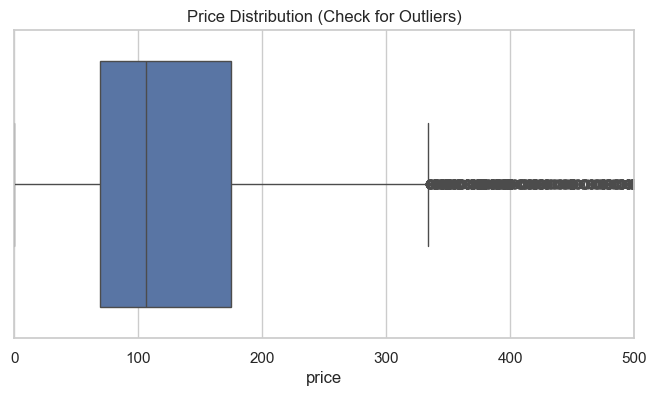

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(x=airbnb_df['price'])
plt.title("Price Distribution (Check for Outliers)")
plt.xlim(0, 500)


In [24]:
## 📺 YouTube Trending Dataset Cleaning


In [25]:
youtube_df.head()
youtube_df.info()
youtube_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [26]:
youtube_df.isnull().sum()


video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [27]:
youtube_df.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 
                 'video_error_or_removed', 'description'], axis=1, inplace=True)


In [28]:
youtube_df.drop_duplicates(inplace=True)


In [30]:
youtube_df['trending_date'] = pd.to_datetime(youtube_df['trending_date'], format='%y.%d.%m', errors='coerce')


In [31]:
youtube_df['trending_date'].head()


0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: trending_date, dtype: datetime64[ns]

In [35]:
airbnb_df.to_csv("Cleaned_AB_NYC_2019.csv", index=False)
youtube_df.to_csv("Cleaned_US_YouTube.csv", index=False)


### 🧼 Data Cleaning Summary

In this project, we cleaned two datasets by:
- Handling missing values
- Removing duplicates
- Standardizing column formats
- Detecting and addressing outliers
